# Assignment 1 Question 11 Example

## Fantasy Premier League Data Analysis

One of my favorite pastimes is watching soccer, and, as most fans are with their respective sport, I have become obsessed with the "fantasy" side of the game.  Fantasy soccer, specifically Fantasy Premier League, is different than other games such as football or basketball: Instead of a draft with your friends, your team is determined by choosing 15 players that fit under a certain budget. You can still play within a league of your friends, but different teams in the same league can have the same players.  Scoring is largely what one would expect: Points, goals, and simply being on the field get a player fantasy points, while getting yellow or red cards makes you lose points.  Clean sheets (shutting out the other team) gain points for all except attackers, but conceding more than two goals in a match makes you lose points as well.  Players can be transferred in and out of a team, but too many users dropping or adding a player can decrease or increase that players' price.

Despite my competitive nature, I have always been pretty bad at picking the right team.  There are a variety of strategies: Try to get players who play or score the most, those who are supposedly undervalued at the beginning, or to try and get players who are bound to rise in price, thus increasing buying power.  I have since analyzed a dataset on Kaggle that has multiple years worth of players' in-game performances and their Fantasy Premier League outcomes, compiled directly from the official website.  Ultimately, all numerical factors that go into a player's score are added, as well as their position.  Each point represents a single season from a single player, meaning that the same player may have produced separate statistics, but each line corresponds to a different year.

The first narrowing down of the dataset is to take out players who are not active enough.  It is clear that not all players play enough to be considered regular enough participants to merit consideration, such as backups and those who had long-term injuries, so I am only going to be taking those who have played above the average amount of minutes played by a given player.  There is a bit of a skew in the data, so this subset contains just under 1000 of the 1800 points.  For other computations I further reduced the dataset in ways that will be described when implemented.

Ultimately, I looked at three different aspects of picking a Fantasy Premier League team.  The first is how to choose a goalkeeper: Would saving more shots or playing more minutes indicate better point accumulation throughout the season?  The second revolves around attackers, and whether their fantasy scoring is more driven by involvement in goals or more time on the pitch.  The last approach revolves around the price of players and their scoring return.  The gamemakers intend the highest-scoring players to be the most expensive, but how accurate are they?  These questions will be investigated further below.


## Goalkeepers

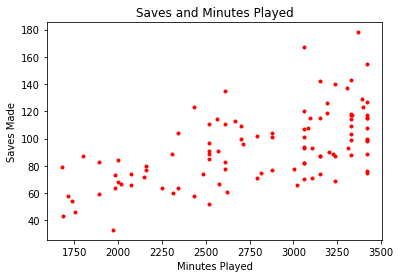

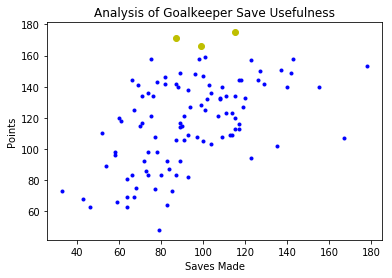

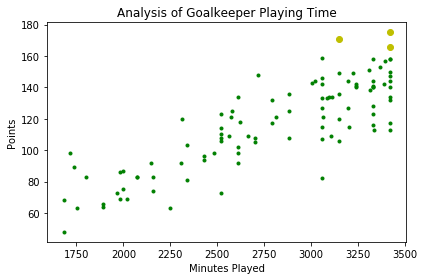

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./data/historical-performance.csv')
active = data[data.minutes > data.minutes.mean()]
keepers = active[active.saves>10]

plt.plot(keepers.minutes, keepers.saves, 'r.')
plt.xlabel("Minutes Played")
plt.ylabel("Saves Made")
plt.title("Saves and Minutes Played")
plt.show()

plt.plot(keepers.saves, keepers.total_points, 'b.')
plt.plot(keepers[keepers.total_points > 160].saves, keepers[keepers.total_points > 160].total_points, 'yo') #adding highlighted points
plt.xlabel("Saves Made")
plt.ylabel("Points")
plt.title("Analysis of Goalkeeper Save Usefulness")
plt.show()

plt.plot(keepers.minutes, keepers.total_points, 'g.')
plt.plot(keepers[keepers.total_points > 160].minutes, keepers[keepers.total_points > 160].total_points, 'yo') #adding highlighted points
plt.xlabel("Minutes Played")
plt.ylabel("Points")
plt.title("Analysis of Goalkeeper Playing Time")
plt.tight_layout()
plt.show()

The above plots look at the relationship between minutes played, saves made, and points scored over a season for goalkeepers with at least 10 saves.  The top plot shows what is likely an obvious result: The more time a keeper spends on the pitch, the more saves they are likely to face.

The next plots look at two possible ways to try to pick goalkeepers in the future: Through high save rates, or by many minutes played.  Both get you points in the game albeit at different rates, so it is worth seeing which would be a better indicator of point return.  The second plot, in blue, shows that the keepers who make the most saves are normally not the ones that score the most points during a season.  Rather, there are is a cluster of keepers that have scored over 160 points but less than 120 saves, which is likely the safest bet for a choice of keeper in the future.  This cluster is also highlighted in the third graph, where all three are near the maximum of minutes played.  Ultimately, picking a keeper should consist of a combination of the most minutes and relatively few saves, although few keepers can!

## Attackers

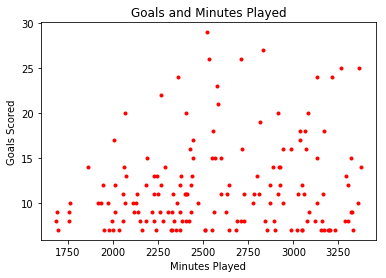

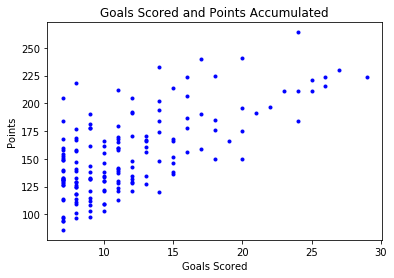

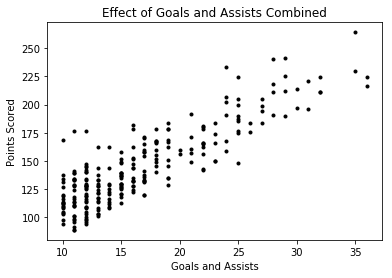

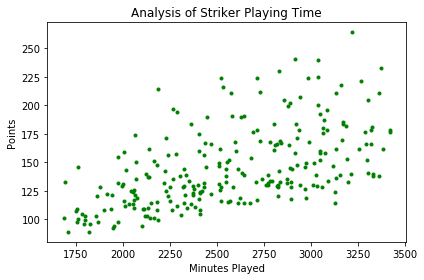

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

data = pd.read_csv('./data/historical-performance.csv')
active = data[data.minutes > data.minutes.mean()]
strikers = active[active.goals_scored>6]
playmakers = active[(active.goals_scored + active.assists) >= 10]

plt.plot(strikers.minutes, strikers.goals_scored, 'r.')
plt.xlabel("Minutes Played")
plt.ylabel("Goals Scored")
plt.title("Goals and Minutes Played")
plt.show()

plt.plot(strikers.goals_scored, strikers.total_points, 'b.')
plt.xlabel("Goals Scored")
plt.ylabel("Points")
plt.title("Goals Scored and Points Accumulated")
plt.show()

plt.plot((playmakers.goals_scored + playmakers.assists), playmakers.total_points, 'k.')
plt.xlabel("Goals and Assists")
plt.ylabel("Points Scored")
plt.title("Effect of Goals and Assists Combined")
plt.show()

plt.plot(playmakers.minutes, playmakers.total_points, 'g.')
plt.xlabel("Minutes Played")
plt.ylabel("Points")
plt.title("Analysis of Striker Playing Time")
plt.tight_layout()
plt.show()

The above set of code analyzes the possible metrics that go into an attacker's score in Fantasy Premier League.  For the first two plots, all players that scored at least six goals were analyzed.  The first plot is minutes spent on the pitch: As one might imagine, players who do not get scoring opportunities much but play a great deal, such as defenders, mean that there is not a large trend in goals scored with respect to minutes played.  Unlike with goalkeepers and saves, outfield players scoring is not such an inevitablity, leading to a weaker relationship.  As such, I moved onto the second plot, which shows the points accumulated with respect to the number of goals scored.  There is much more of a positive relationship here, though there are outliers at lower goal totals that have accumulated exceptionally-large fantasy point tallies.  This leads into the third plot, which combines goals and assists into a single statistic.  For this and the last plot, only players with at least 10 goals and assists in a season were considered, and the plot of subsequent points scored were much stronger.  Most of the outliers that occurred in the goals-only plot were fit into a more concise line, suggesting that only considering goals misses a significant portion of fantasy point accumulation.  Lastly, there seems to be a slight relationship between the amount of minutes played and points scored in fantasy, which suggests that some players who had reduced minutes due to rotation or injury would have performed better otherwise.  In the end, I would suggest trying to find a durable player that will not miss much game time, but also has a high tendency to get a combination of goals and assists.

## Pricing

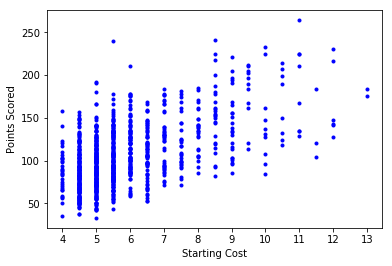

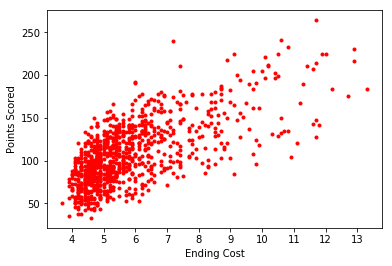

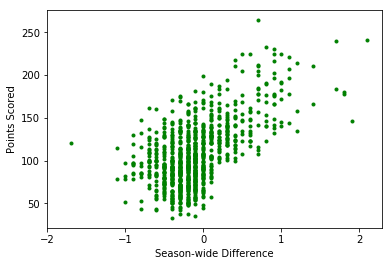

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

data = pd.read_csv('./data/historical-performance.csv')
active = data[data.minutes > data.minutes.mean()]

plt.plot((active.start_cost/10), active.total_points, 'b.')
plt.xticks(range(4, 14))
plt.xlabel("Starting Cost")
plt.ylabel("Points Scored")
plt.show()

plt.plot(((active.end_cost)/10), active.total_points, 'r.')
plt.xticks(range(4, 14))
plt.xlabel("Ending Cost")
plt.ylabel("Points Scored")
plt.show()

plt.plot(((active.end_cost - active.start_cost)/10), active.total_points, 'g.')
plt.xticks(range(-2, 3))
plt.xlabel("Season-wide Difference")
plt.ylabel("Points Scored")
plt.show()

The next section of this analysis will handle the relationship between season-long points scored and difference in price.  In the game, the better and more exciting players are going to be priced higher, while players that underperform are going to drop in price as more people drop them from their teams.  The data has not been further restricted in this section, and I intend to answer the question of whether a player being higher-priced corresponds to more fantasy points scored.  The answer is that there is a weak upward linear trend, but there is a wide variety in the priced that start out as 0.5 million pound increments and maybe should not be seen as a strong indicator of price.  What is more indicative is the ending price, which makes sense, seeing that better players will be transferred in, and enough of these transfers will increase price.  Unfortunately, one cannot see the ending price during the season, so instead I decided to look at changes in price in the third plot.  In this plot, it seems that the better players go up in price, regardless of starting price.  This means that even if the player is the most expensive in the game, their good play will correspond with an increase in price.  The plot, therefore, supports a bit of a strategy then: One can see what players change price, and while a user may want to hold on to their favorite or original players, it may be more effective to watch what the crowd is doing and move players in and out of their team effectively.  Also, if one successfully latches onto a player that increases in price, the user now has more buying power if and when they choose to move that player out of their team.

## Summary

In this presentation, I have looked at a number of facets that may build into a successful Fantasy Premier League team.  The first is how to choose a goalkeeper for your team, and it has been fairly well proven that the best choices are those who are reliable to play but are not forced to make as many saves, likely due to a stronger defensive unit or style of play.  The second section looked at the choices for attackers, determining that, while minutes played are important to have plenty of opportunities, a player's return in fantasy is most heavily affected by the sum of their goals and assists.  Lastly, I evaluated the possible relationship between price and points scored, which surprisingly is not a very strong one.  What corresponds to fantasy point accumulation is more the change in price during a season: The better players will have more transfers in and increase in price.  As such, following the "hype" of users during the season may be useful, as there are not too many flukes of players who have increasing prices but still perform poorly during the season.  Altogether, I hope that I can use my findings for next season of Fantasy Premier League, and finally actually beat my friends for once, using the new perspective found through this post!